In [1]:

from IPython.display import Markdown, display

from wid_config import WIDConfig
from wid_torch import *

import pandas as pd
import numpy as np
np.random.seed(42)
rng = np.random.default_rng(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pathlib import Path
data_path = Path('./data')
data_dir = data_path / 'train_images'


import os
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision.transforms import v2
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

torch.manual_seed(2024)

data/traininglabels.csv data/testlabels.csv data/holdout.csv
data/traininglabels.csv


2024-11-13 01:45 - WARNING - dropped 702 missing images
2024-11-13 01:45 - WARNING - dropped 0 missing images


## Load Data

data/traininglabels.csv data/testlabels.csv data/holdout.csv


### Test Data

,image_id,has_oilpalm,score,base_path
0,img_04925.jpg,0,1.0,data/leaderboard_test_data
1,img_04817.jpg,1,1.0,data/leaderboard_test_data
4,img_09008.jpg,0,1.0,data/leaderboard_test_data
5,img_05650.jpg,0,1.0,data/leaderboard_test_data
9,img_05861.jpg,0,1.0,data/leaderboard_test_data


### Test Data Distribution

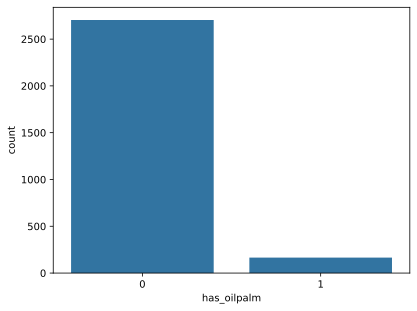

data/traininglabels.csv


2024-11-13 01:45 - WARNING - dropped 702 missing images


### Train Data

,image_id,has_oilpalm,score,base_path
0,img_00001.jpg,0,1.0,data/train_images
1,img_00002.jpg,0,1.0,data/train_images
2,img_00013.jpg,0,1.0,data/train_images
3,img_00014.jpg,0,1.0,data/train_images
4,img_00025.jpg,0,1.0,data/train_images


### Train Data Distribution

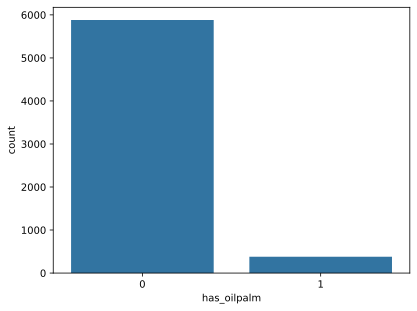

2024-11-13 01:45 - WARNING - dropped 0 missing images


### Train Data after Oversampling

,image_id,has_oilpalm,score,base_path
0,img_04459.jpg,0,1.0,data/leaderboard_test_data
1,img_03160.jpg,1,1.0,data/train_images
2,img_01224.jpg,0,1.0,data/train_images
3,img_08050.jpg,0,1.0,data/train_images
4,img_06870.jpg,0,1.0,data/train_images


### Train Data Distribution after Oversampling

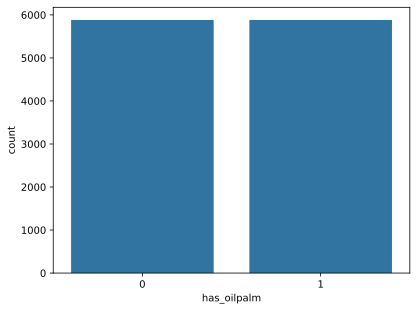

### Holdout Data

,image_id,has_oilpalm,score,base_path
0,img_050982017.jpg,1,1.0000,data/leaderboard_holdout_data
1,img_101882017.jpg,1,1.0000,data/leaderboard_holdout_data
2,img_109452017.jpg,1,0.8079,data/leaderboard_holdout_data
3,img_009842017.jpg,1,1.0000,data/leaderboard_holdout_data
4,img_083672017.jpg,1,1.0000,data/leaderboard_holdout_data


### Holdout Data Distribution

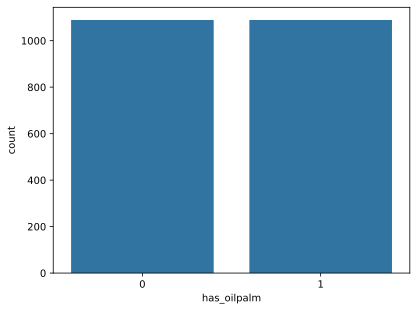

In [2]:
config = WIDConfig(verbose=True, model_name="resnet50")

# config.df = config.df.sample(n=1000, random_state=config.random_state)

## Instantiate wid_torch for PyTorch model 1

## define the model

In [3]:
# base model
_model = models.resnet50(weights="ResNet50_Weights.IMAGENET1K_V2")

# rebuild the head to suit our purpose
# strucure 2048 --> 32 --> num_classes
_model.fc = nn.Sequential(
    nn.Linear(_model.fc.in_features, 32),
    nn.BatchNorm1d(32),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(32, config.num_classes),
)
resnet_50 = WIDTorch(config=config, model=_model)

In [4]:
resnet_50.train(freeze=5)

Training model...
Model saved at epoch 1 (score)
Epoch [1/100], Loss: 0.5734, Val Loss: 0.5425, Val ROC AUC: 0.7771
Model saved at epoch 2 (score)
Epoch [2/100], Loss: 0.5584, Val Loss: 0.5440, Val ROC AUC: 0.7800
Model saved at epoch 3 (score)
Epoch [3/100], Loss: 0.5533, Val Loss: 0.5361, Val ROC AUC: 0.7909
Model saved at epoch 4 (score)
Epoch [4/100], Loss: 0.5467, Val Loss: 0.5404, Val ROC AUC: 0.7914


In [5]:
resnet_50.train(freeze=False)

Training model...
Model saved at epoch 5 (score)
Epoch [5/100], Loss: 0.5889, Val Loss: 0.5581, Val ROC AUC: 0.7563
Epoch [6/100], Loss: 0.5715, Val Loss: 0.6149, Val ROC AUC: 0.7230
Model saved at epoch 7 (score)
Epoch [7/100], Loss: 0.5694, Val Loss: 0.5668, Val ROC AUC: 0.7598
Model saved at epoch 8 (score)
Epoch [8/100], Loss: 0.5660, Val Loss: 0.5555, Val ROC AUC: 0.7776
Epoch [9/100], Loss: 0.5601, Val Loss: 0.5591, Val ROC AUC: 0.7710
Model saved at epoch 10 (loss)
Epoch [10/100], Loss: 0.5571, Val Loss: 0.5492, Val ROC AUC: 0.7753
Epoch [11/100], Loss: 0.5564, Val Loss: 0.5820, Val ROC AUC: 0.7504
Model saved at epoch 12 (score)
Epoch [12/100], Loss: 0.5506, Val Loss: 0.5498, Val ROC AUC: 0.7785
Model saved at epoch 13 (loss)
Epoch [13/100], Loss: 0.5483, Val Loss: 0.5426, Val ROC AUC: 0.7778
Model saved at epoch 14 (score)
Epoch [14/100], Loss: 0.5525, Val Loss: 0.5434, Val ROC AUC: 0.7818
Epoch [15/100], Loss: 0.5514, Val Loss: 0.5556, Val ROC AUC: 0.7762
Epoch [16/100], Loss

In [19]:
resnet_50.train(freeze=20)

Training model...
Model saved at epoch 32 (score)
Epoch [32/120], Loss: 0.5493, Val Loss: 0.5329, Val ROC AUC: 0.7769
Epoch [33/120], Loss: 0.5477, Val Loss: 0.5444, Val ROC AUC: 0.7757
Model saved at epoch 34 (score)
Epoch [34/120], Loss: 0.5446, Val Loss: 0.5355, Val ROC AUC: 0.7805
Model saved at epoch 35 (score)
Epoch [35/120], Loss: 0.5475, Val Loss: 0.5413, Val ROC AUC: 0.7813
Model saved at epoch 36 (loss)
Epoch [36/120], Loss: 0.5481, Val Loss: 0.5372, Val ROC AUC: 0.7720
Model saved at epoch 37 (score)
Epoch [37/120], Loss: 0.5447, Val Loss: 0.5367, Val ROC AUC: 0.7854
Epoch [38/120], Loss: 0.5450, Val Loss: 0.5375, Val ROC AUC: 0.7836
Model saved at epoch 39 (loss)
Epoch [39/120], Loss: 0.5441, Val Loss: 0.5337, Val ROC AUC: 0.7850
Epoch [40/120], Loss: 0.5463, Val Loss: 0.5368, Val ROC AUC: 0.7829
Epoch [41/120], Loss: 0.5503, Val Loss: 0.5380, Val ROC AUC: 0.7840
Epoch [42/120], Loss: 0.5421, Val Loss: 0.5452, Val ROC AUC: 0.7732
Model saved at epoch 43 (loss)
Epoch [43/120

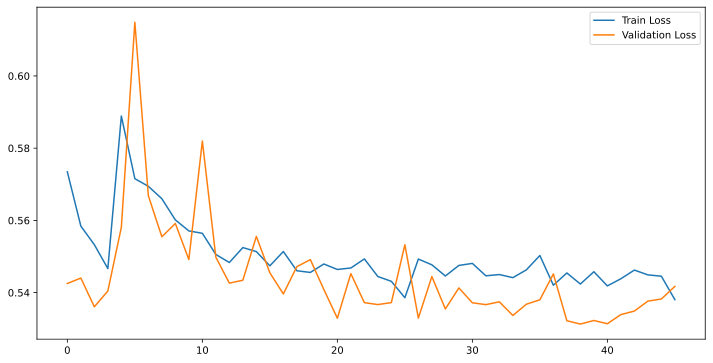

In [20]:
resnet_50.plot_losses()

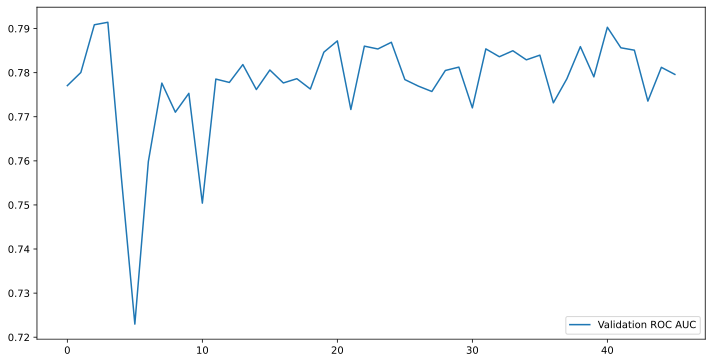

In [21]:
resnet_50.plot_scores()

## Load the best model and make predictions on the test set

### Early Stopped model

## Holdout ROC AUC: `0.9729`


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1089
           1       0.94      0.91      0.92      1089

    accuracy                           0.92      2178
   macro avg       0.92      0.92      0.92      2178
weighted avg       0.92      0.92      0.92      2178




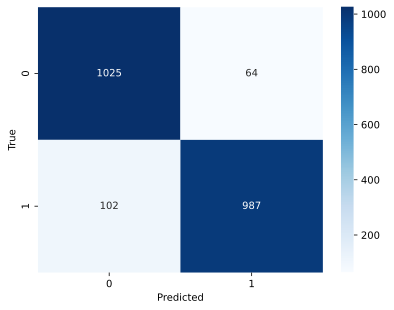

In [22]:
resnet_50.evaluate_holdout()

### Best Validation Loss Model

## Holdout ROC AUC: `0.9800`


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1089
           1       0.92      0.94      0.93      1089

    accuracy                           0.93      2178
   macro avg       0.93      0.93      0.93      2178
weighted avg       0.93      0.93      0.93      2178




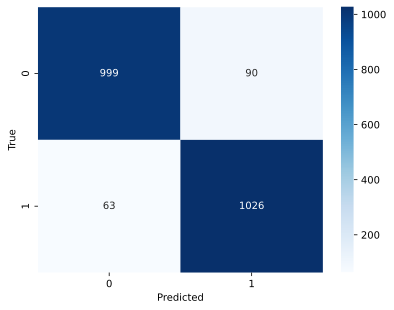

In [24]:
resnet_50.resume(_model, "Exp:7_Model:resnet50_epoch:4_vloss:0.5404_auc:0.7914_S.pth")
resnet_50.evaluate_holdout()